----------------------------------------------------------------------------------------------------------------------------------

# Section 3: Geographical Analysis of Demand and Supply
    Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.
    Tasks:
    Data Preprocessing:
        Handle missing values.
        Encode geographical variables.
    Geographical Analysis:
        Visualize the distribution of advertisements across different regions.
        Identify regions with high demand and supply.
    Temporal Analysis:
        Analyze how demand and supply vary over time in different regions.
        Identify any seasonal trends or patterns.
    Modeling Demand and Supply:
        Develop a regression model to predict demand and supply based on geographical and temporal features.
        Evaluate the model using appropriate metrics.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [52]:
dff = pd.read_csv('vehicles.csv')

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [54]:
dff.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [55]:
dff.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [56]:
dff.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [57]:
dff=dff.drop('details',axis=1)
dff=dff.drop('member_since',axis=1)

In [58]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [59]:
dff['price'] = pd.to_numeric(dff['price'].str.replace('Rs', '').str.replace(',', ''), errors='coerce')

In [60]:
dff['price'].fillna(dff['price'].median(), inplace=True)

In [61]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                      0
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [62]:
categorical_features = ['type', 'category','is_verified','location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
label_encoders = {col: LabelEncoder() for col in categorical_features}

In [63]:
for col in categorical_features:
    dff[col] = label_encoders[col].fit_transform(dff[col])

In [64]:
dff.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [65]:
# Convert categorical geographical variables to numerical using one-hot encoding
label =LabelEncoder()
for column in ['location','geo_region','area']:
    dff[column]= label.fit_transform(dff[column])


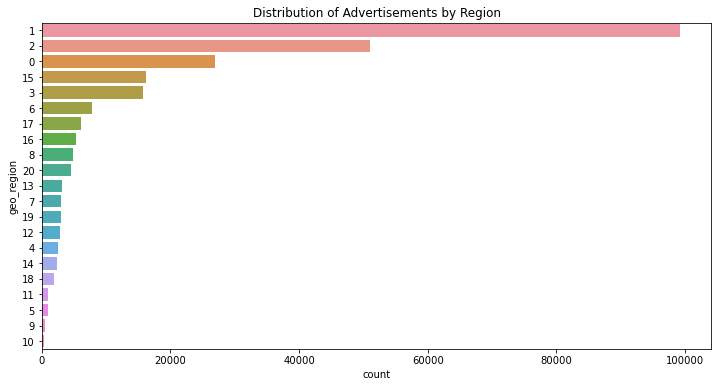

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of advertisements by region
plt.figure(figsize=(12, 6))
sns.countplot(y='geo_region', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements by Region')
plt.show()


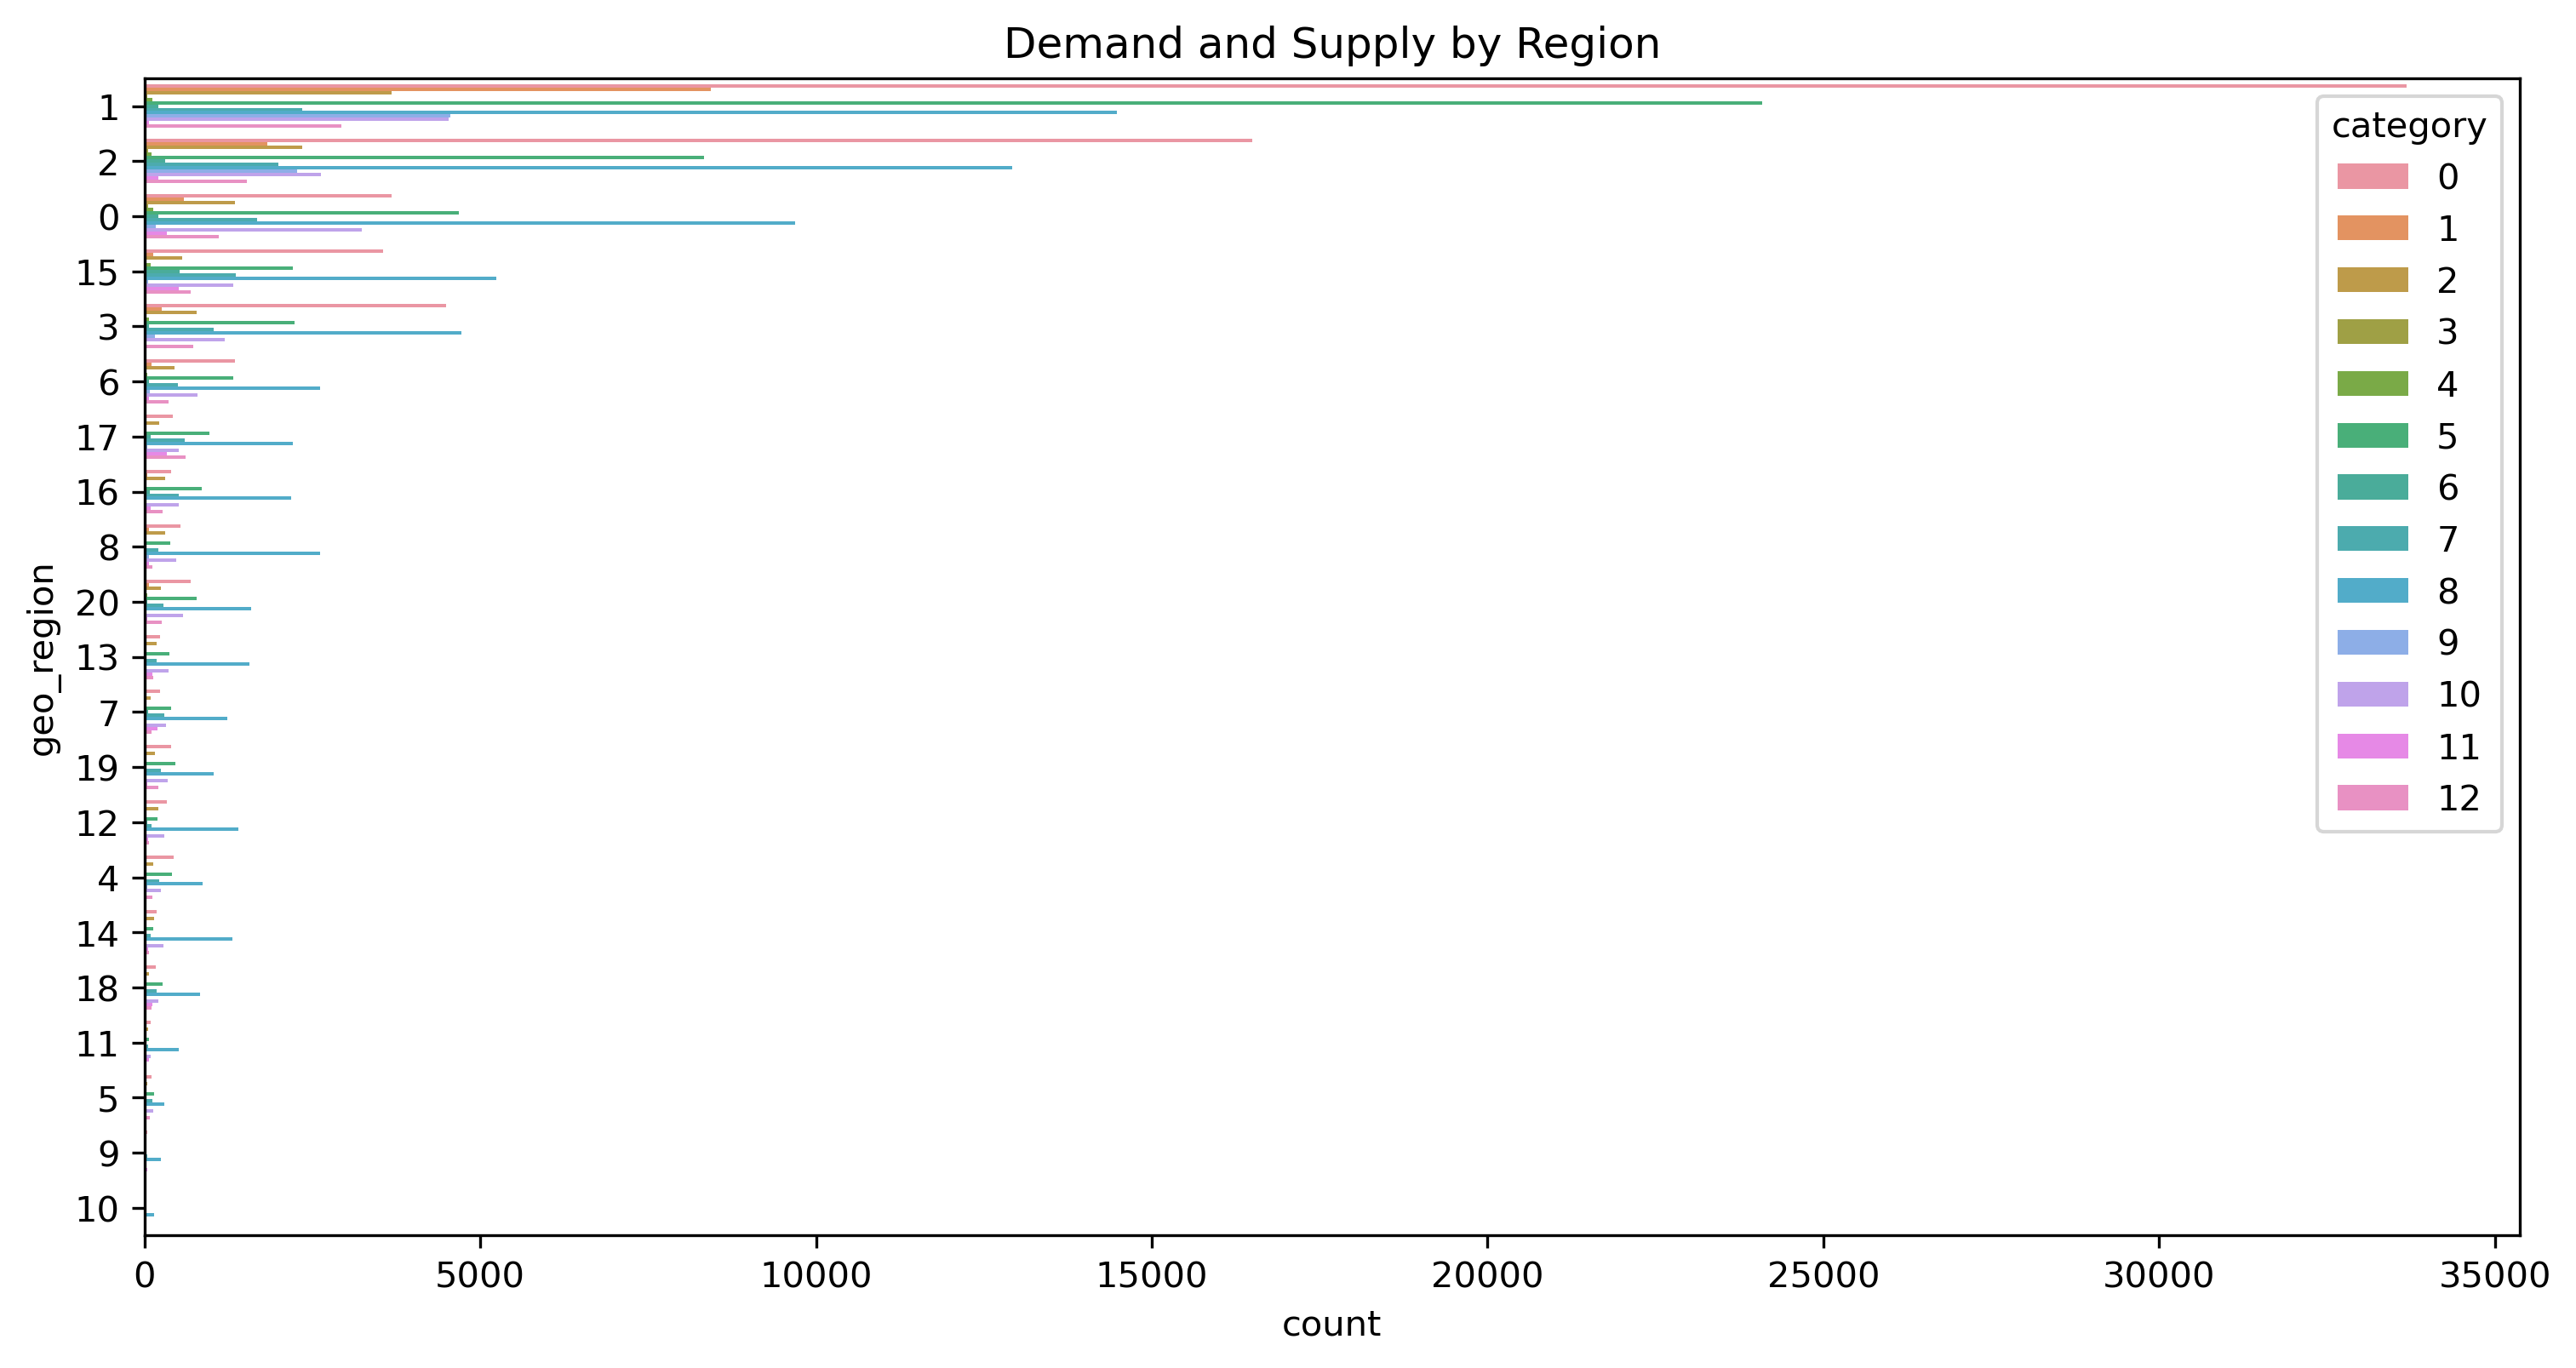

In [71]:
# Assuming 'category' or 'parent_category' indicates demand and supply
plt.figure(figsize=(12, 6),dpi=300)
sns.countplot(y='geo_region', hue='category', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Demand and Supply by Region')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


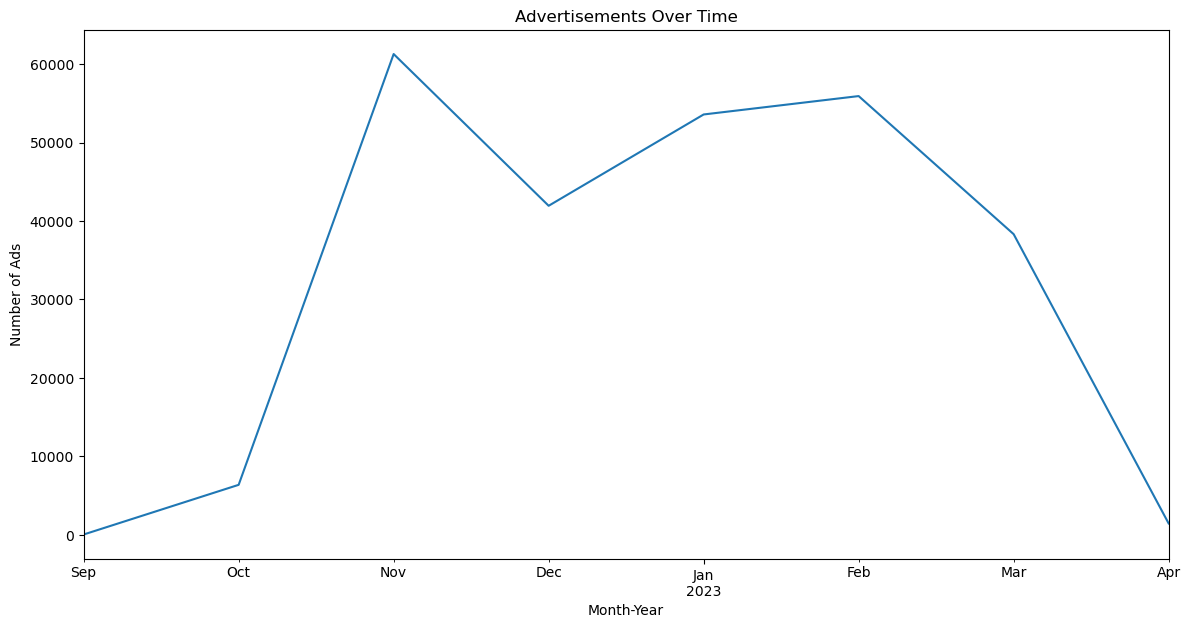

In [73]:
dff['posted_date'] = pd.to_datetime(dff['posted_date'])
dff['month_year'] = dff['posted_date'].dt.to_period('M')

# Plotting advertisements over time
plt.figure(figsize=(14, 7),dpi=100)
dff.groupby('month_year').size().plot()
plt.title('Advertisements Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Ads')
plt.show()


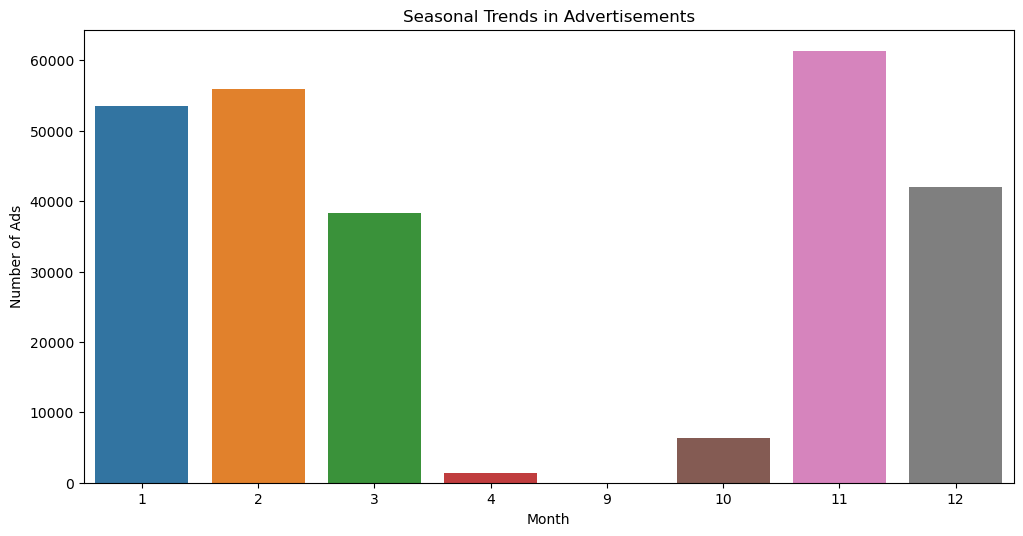

In [76]:
dff['month'] = dff['posted_date'].dt.month

plt.figure(figsize=(12, 6),dpi=100)
sns.countplot(x='month', data=dff)
plt.title('Seasonal Trends in Advertisements')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.show()


In [77]:
# Example features and target (customize based on your dataset)
features = ['price', 'timestamp'] + list(dff.columns[dff.columns.str.startswith('location_')])
target = 'some_target_variable'  # define your target variable

price_index = dff.columns.get_loc('price')
y = dff.iloc[:, price_index]
X = dff.iloc[:, dff.columns != 'price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'